In [131]:
#pip install tensorflow

In [132]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [133]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [134]:
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)


In [135]:
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

In [136]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes = 10)

In [137]:
model = Sequential([
    Dense(50,input_shape = (784,),activation = 'relu'),
   # Dense(30,activation = 'tanh'),
    Dense(50,activation = 'relu'),
    Dense(10,activation = 'softmax')
])

In [138]:
model.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.001),
            loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [139]:
batch_size = 100
max_epochs = 30
early_stopping = EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = max_epochs, validation_data = (x_test,y_test),
                    callbacks =[early_stopping] )

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8296 - loss: 0.6146 - val_accuracy: 0.9361 - val_loss: 0.2030
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9426 - loss: 0.1922 - val_accuracy: 0.9563 - val_loss: 0.1440
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9594 - loss: 0.1334 - val_accuracy: 0.9615 - val_loss: 0.1300
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9675 - loss: 0.1081 - val_accuracy: 0.9655 - val_loss: 0.1088
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.0896 - val_accuracy: 0.9706 - val_loss: 0.0990
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9774 - loss: 0.0768 - val_accuracy: 0.9720 - val_loss: 0.0928
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9800 - loss: 0.0667 - val_accuracy: 0.9735 - val_loss: 0.0914
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9814 - loss: 0.0626 - val_accuracy: 0.

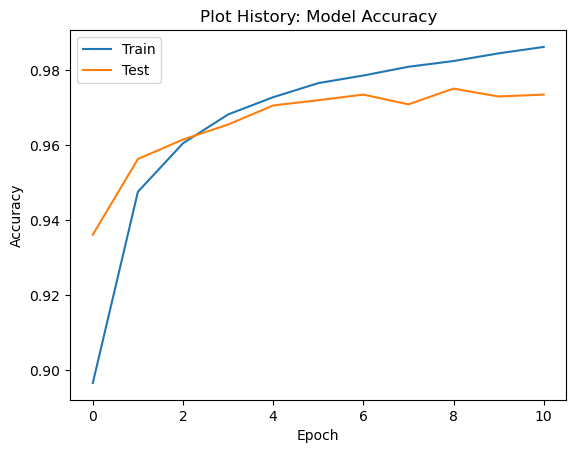

In [147]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Plot History: Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [140]:
model.save('mnist_model.h5')

In [141]:
test_loss,test_accuracy = model.evaluate(x_test,y_test)
test_accuracy_percentage = test_accuracy *100
print(test_accuracy_percentage)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9719 - loss: 0.0988
97.50999808311462


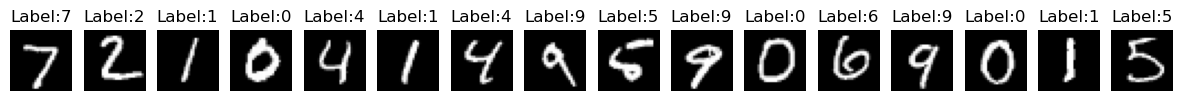

In [142]:
(_,_),(x_test,y_test) = mnist.load_data()
num_samples = 16
plt.figure(figsize=(15,6))
for i in range (num_samples):
    plt.subplot(1,num_samples,i+1)
    plt.imshow(x_test[i],cmap ='gray')
    plt.title(f"Label:{y_test[i]}")
    plt.axis('off')
plt.show()

In [143]:
loaded_model = tf.keras.models.load_model('mnist_model.h5')

In [144]:
(_, _), (x_test, y_test) = mnist.load_data()
index = 14
input_size = 28 * 28
preprocessed_image = x_test[index].reshape(-1, input_size).astype('float32') / 255.0
print("Preprocessed image shape:", preprocessed_image.shape)
model = tf.keras.models.load_model('mnist_model.h5')
predictions = model.predict(preprocessed_image)
predicted_label = np.argmax(predictions)
print("Predicted label:", predicted_label)

Preprocessed image shape: (1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted label: 1
